                        Objectives          

1. Use the attached penguins' dataset to build a machine learning model - Decision Tree Classifier and make predictions on the penguins' gender using the relevant variables.
2. Make sure to compute the relevant evaluation metrics as well as the classification report and have a brief report on the outputs.
3. Generate an output of the actual values and the predicted values as one dataframe.
Outline the various features used by the model and arrange them in descending order by nature of importance.
4. Generate a visualization of the Decision Tree model.

1. Use the attached penguins' dataset to build a machine learning model - Decision Tree Classifier and make predictions on the penguins' gender using the relevant variables.

In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



data = "penguins_size.csv"
dataset = pd.read_csv(data)


dataset.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


check the size of the dataset , any duplicates , any missing values e.t.c 


In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [75]:
dataset.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [76]:
dataset.duplicated().sum()

np.int64(0)

deal with duplicate  & missing values

In [77]:
# deal with duplicate  & missing values
dataset = dataset.drop_duplicates()
dataset = dataset.dropna()
dataset.isnull().sum()
dataset.duplicated().sum()

np.int64(0)

encode the varriables

In [78]:
peng_set = pd.get_dummies(dataset, columns=['species', 'island'], drop_first=True)
X_train = peng_set.drop(["sex"], axis=1)
Y_train = peng_set["sex"].map({"MALE": 0, "FEMALE": 1})

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)

In [80]:
X_train_clean = X_train[~Y_train.isna()]
Y_train_clean = Y_train.dropna()

dtree = DecisionTreeClassifier(random_state=42, max_depth=4)
dtree.fit(X_train_clean, Y_train_clean)

DecisionTreeClassifier(max_depth=4, random_state=42)

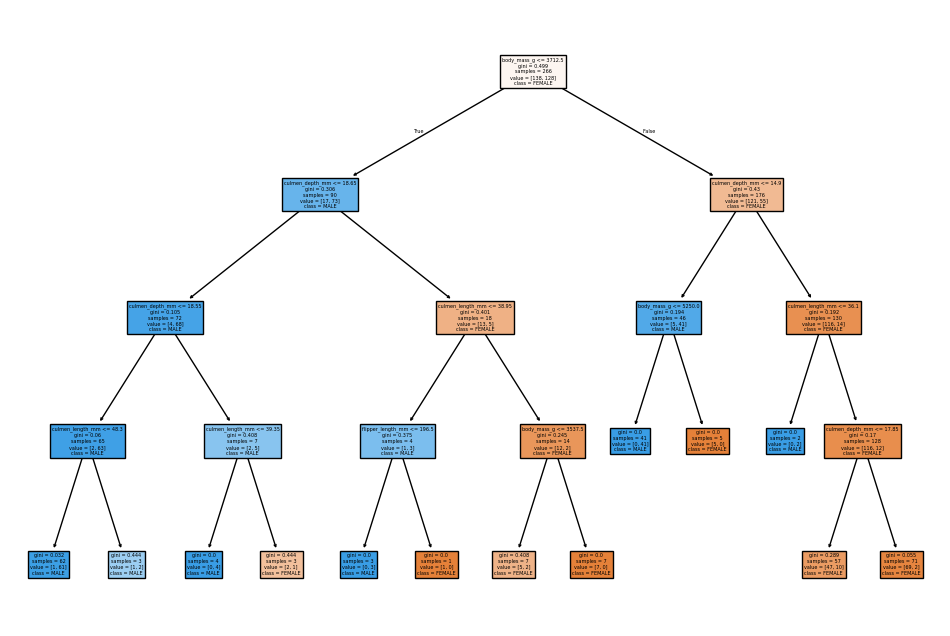

In [81]:
# plot the tree
plt.figure(figsize=(12,8))
plot_tree(dtree, feature_names=X_train.columns, class_names=["FEMALE", "MALE"], filled=True)
plt.show()

2. Make sure to compute the relevant evaluation metrics as well as the classification report and have a brief report on the outputs.

accuracy

In [82]:
y_pred = dtree.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
accuracy


0.8656716417910447

confusion matrix

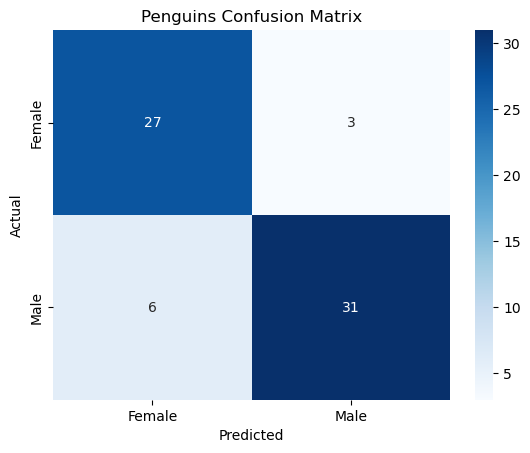

In [83]:
conf = confusion_matrix(Y_test,y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title("Penguins Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [84]:
repo = classification_report(Y_test, y_pred)
repo

'              precision    recall  f1-score   support\n\n         0.0       0.82      0.90      0.86        30\n         1.0       0.91      0.84      0.87        37\n\n    accuracy                           0.87        67\n   macro avg       0.86      0.87      0.87        67\nweighted avg       0.87      0.87      0.87        67\n'

3. Generate an output of the actual values and the predicted values as one dataframe.
Outline the various features used by the model and arrange them in descending order by nature of importance.

In [85]:
results_df = pd.DataFrame({'Actual': Y_test.map({1: 'MALE', 0: 'FEMALE'}).values,'Predicted': pd.Series(y_pred).map({1: 'MALE', 0: 'FEMALE'}).values})

results_df

,Actual,Predicted
0,MALE,MALE
1,MALE,MALE
2,FEMALE,FEMALE
3,MALE,MALE
4,FEMALE,FEMALE
...,...,...
62,MALE,MALE
63,MALE,MALE
64,FEMALE,MALE
65,FEMALE,FEMALE


In [86]:
feature_importance = pd.Series(dtree.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

feature_importance


culmen_depth_mm      0.540492
body_mass_g          0.372527
culmen_length_mm     0.072687
flipper_length_mm    0.014294
species_Chinstrap    0.000000
species_Gentoo       0.000000
island_Dream         0.000000
island_Torgersen     0.000000
dtype: float64

4. Generate a visualization of the Decision Tree model

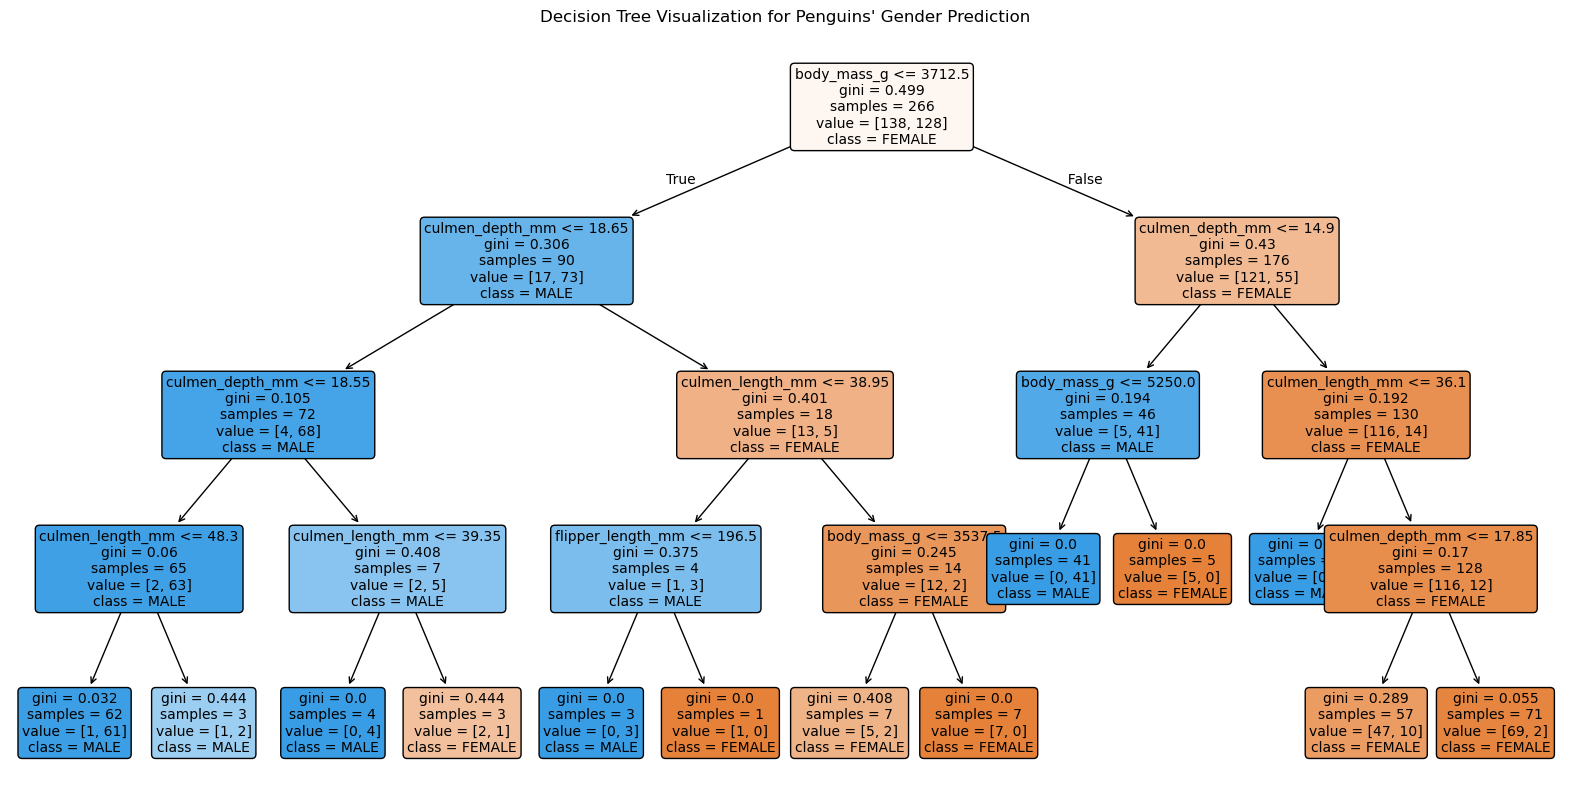

In [87]:
plt.figure(figsize=(20,10))
plot_tree(dtree,feature_names=X_train.columns,class_names=['FEMALE', 'MALE'],filled=True,rounded=True,fontsize=10)
plt.title("Decision Tree Visualization for Penguins' Gender Prediction")
plt.show()
